<div class = "alert alert-block alert-info">
    <b> Przetwarzanie obrazów. Operacje punktowe </b>
   
FTiMS, semestr zimowy 2022/2023

Laboratorium 6
</div>

### Zapoznaj się z ...

Zapoznaj się z:
- https://www.dynamsoft.com/blog/insights/image-processing/image-processing-101-color-space-conversion/
- https://www.dynamsoft.com/blog/insights/image-processing/image-processing-101-point-operations/

Następnie zapoznaj się z treścią niniejszego notebooka. Wykonaj kod i przeanalizuj wyniki. Możesz eksperymentować z kodem, parametrami, itd. 

### Uwaga

1. Przykłady przedstawione w niniejszym notebooki dotyczą operacji na trzech konkretnych obrazach, które zostały dołączone do zadania.
1. **Zadanie do rozwiązania jest umieszczone na końcu notebooka.**

## Przekształcenie *gamma* (wykładnicze)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

Wczytanie i wyświetlenie przykładowego obrazu. Dla ułatwienia obraz transformujemy do postaci skalarnej.

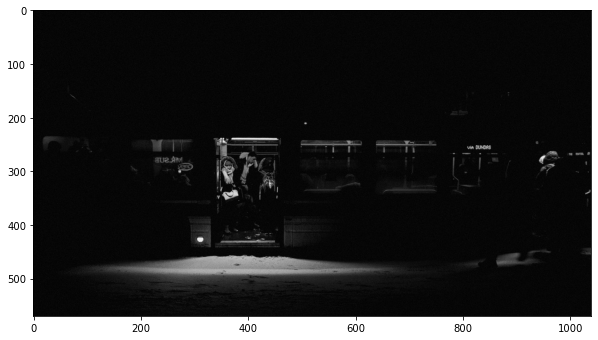

In [3]:
plt.figure(figsize = (10,10))
img = plt.imread('ali-tayyebi-unsplash-small.jpg')
img = 0.299 * img[:,:,0] + 0.587 *img[:,:,1] + 0.114*img[:,:,2]
plt.imshow(img, cmap = 'gray')

Definiujemy funkcję normalizującą obraz. W tym przypadku normalizacja to nic innego jak przekształcenie min-max odwzorowujące przedział wartości $0.255$ na przedział $0..1$

In [4]:
def normalization(mat):
    return (mat - np.min(mat)) / (np.max(mat) - np.min(mat))

Normalizacja nie wywołuje efektu wizualnego. Jest to transformacja wykonywana na etapie preprocessingu: wygodnie jest posiadać piksele w przedziale $0..1$. Nie trzeba ich skalować, a do przedziału $0..255$ zawsze można wrócić. Po lewej obraz przed normalizacją, po prawej po normalizacji. W dalszej części będziemy przetwarzać obraz po normalizacji.

Text(0.5, 1.0, 'obraz po normalizacji')

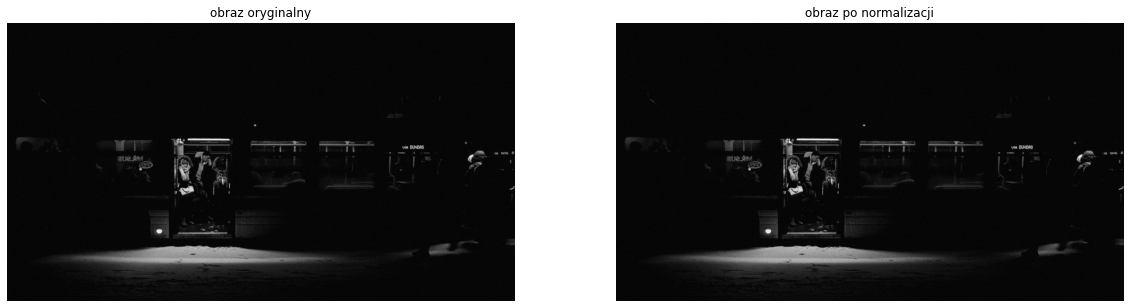

In [5]:
img = normalization(img)
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.title('obraz oryginalny')

plt.subplot(1,2,2)
plt.imshow(img, cmap = 'gray')n
plt.axis('off')
plt.title('obraz po normalizacji')

Wykonujemy przykładowe transformacje wykładnicze, dla 4 różnych wartości wykładnika. Widać, że jeśli celem jest korekta niedoświetlonego obrazu, to tylko dwie spośród czterech poniższych operacji są *właściwe*.

In [6]:
wykladnik = np.array([0.25, 0.5, 2, 4])

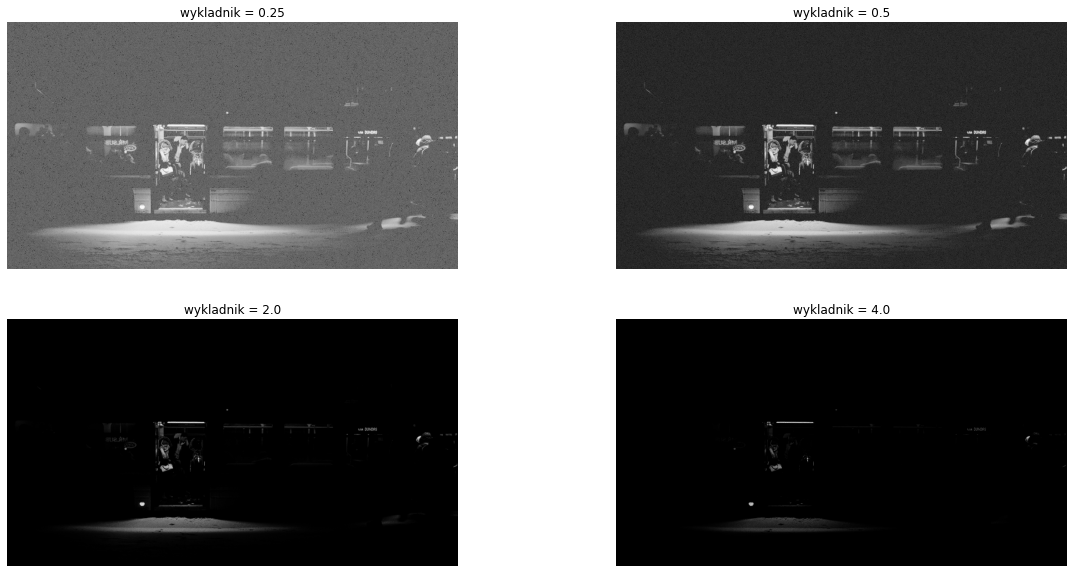

In [7]:
plt.figure( figsize = (20,10) )
for  idx, w in enumerate(wykladnik):
    plt.subplot(2, 2, idx+1)
    plt.imshow( np.power(img, w), cmap = 'gray' )
    plt.axis('off')
    plt.title('wykladnik = '+str(w))

Wynik transformacji staje się oczywisty po wykreśleniu funkcji przekształcenia:

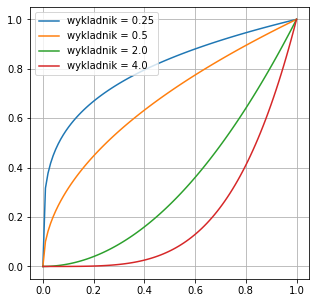

In [8]:
x = np.linspace(0,1,100)
plt.figure( figsize = (5,5) )
for idx, w in enumerate(wykladnik):
    plt.plot(x, np.power(x, w), label = 'wykladnik = '+str(w) )
plt.legend(loc = 'upper left')
plt.grid()

<div class = "alert alert-block alert-warning">
Wykonaj kilka eksperymentów z innymi wartościami wykładnika. Zastanów się nad wynikami przetwarzania.
</div>

## Mieszanie obrazów

Wykonajmy mieszanie dwóch obrazów (tego typu pytanie pojawiło się kiedyś podczas wykładu)

In [9]:
img1 = plt.imread('butterfly.jpg')
img2 = plt.imread('megan-leong-unsplash-small.jpg')

In [10]:
print(img1.shape); print(img2.shape)

(931, 931, 3)
(657, 438, 3)


Ze względu na różny rozmiar obu obrazów dostosujemy rozmiar większego obrazu do mniejszego (obraz większy zostanie przycięty)

In [11]:
img1 = img1[:657, 0:438,:]
img2 = img2[0:657,0:438,:]

Na tym etapie możemy przedstawić obraz wynikowy jako kombinację obu obrazów

In [12]:
img = (0.3 * img1 + 0.7 * img2 ).astype(np.uint8)

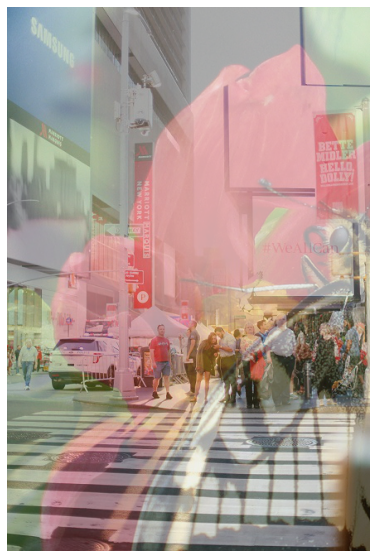

In [13]:
plt.figure( figsize = (10,10))
plt.imshow(img)
plt.axis('off');

# Zadanie

(**1 punkt**) Dana jest funkcja kawałkami liniowa:
- $3 \cdot x$ dla $x \in [0,30]$,
- $\big\lceil 0.73 \cdot x + 68 \big\rceil$ dla $x>30$.

Narysuj wykres takiej funkcji dla zakresu wartości zmiennej wejściowej $\in [0,255]$ oraz przetransformuj za jej pomocą obraz ``ali-tayyebi-unsplash-small.jpg``. Wyświetl obraz oryginalny oraz obraz po transformacji.

*tu umieść swoje rozwiązanie*

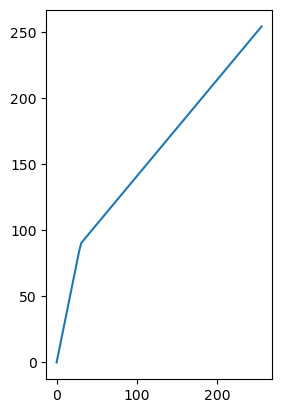

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


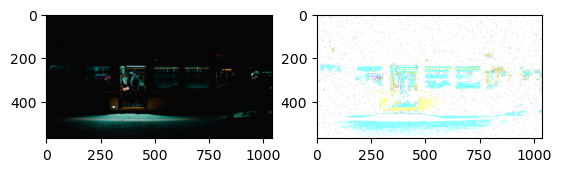

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.where(x <= 30, 3*x, 0.73*x+68)

x = np.linspace(0, 255, 100)
plt.subplot(1,2,1)
plt.plot(x, f(x))
plt.show()

img = plt.imread('ali-tayyebi-unsplash-small.jpg')
plt.subplot(2,2,1)
plt.imshow(img)

def function(mat):
    return np.where(mat <= 30, 3*mat, 0.73*mat+68)

img2=function(img)

plt.subplot(2,2,2)
plt.imshow(img2)